In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.display import display

In [3]:
train = pd.read_csv('온도추정/train.csv')
test = pd.read_csv('온도추정/test.csv')

In [4]:
train.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [5]:
train.describe()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
count,4752.00000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,...,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,432.000000
mean,2375.50000,20.227904,988.621107,1.509764,1.453157,1.270223,1008.333902,989.005093,21.658081,1008.790341,...,22.222801,23.737269,24.649653,23.641898,20.926157,21.319444,21.564468,22.969097,23.381829,26.687500
std,1371.92857,4.707570,3.359916,1.071858,0.936151,4.429852,3.395037,3.403714,4.377216,3.520317,...,9.112299,10.599000,12.214870,8.400081,6.106031,7.066149,6.810084,8.054272,9.275172,6.286621
min,0.00000,8.300000,977.300000,0.000000,0.000000,0.000000,997.200000,978.100000,11.600000,997.300000,...,3.500000,4.000000,3.000000,6.000000,7.500000,7.500000,7.000000,6.000000,7.000000,18.500000
25%,1187.75000,16.900000,986.800000,0.700000,0.800000,0.000000,1006.500000,987.100000,18.400000,1006.700000,...,15.500000,15.500000,15.000000,17.000000,16.500000,16.500000,16.500000,16.500000,16.000000,21.000000
50%,2375.50000,19.900000,988.600000,1.300000,1.300000,0.000000,1008.500000,989.100000,21.200000,1008.800000,...,20.000000,20.500000,21.000000,22.000000,19.500000,19.500000,20.000000,21.500000,20.000000,25.000000
75%,3563.25000,24.100000,991.000000,2.100000,2.000000,0.000000,1010.800000,991.600000,24.825000,1011.400000,...,30.500000,32.500000,34.500000,30.500000,25.000000,25.000000,27.000000,30.000000,32.000000,31.500000
max,4751.00000,30.900000,997.200000,10.200000,5.800000,25.600000,1016.800000,997.400000,32.700000,1017.500000,...,42.000000,49.000000,53.000000,43.500000,38.000000,42.500000,40.500000,41.500000,43.500000,41.500000


데이터 설명 :
- 대전지역에서 측정한 실내외 19곳의 센서데이터와, 주변 지역의 기상청 공공데이터를 semi-비식별화하여 제공합니다.
- 센서는 온도를 측정하였습니다.
- 모든 데이터는 시간 순으로 정렬 되어 있으며 10분 단위 데이터 입니다.
- 예측 대상(target variable)은 Y18입니다.

train data 설명 :
- 30일 간의 기상청 데이터 (X00\~X39) 및 센서데이터 (Y00\~Y17)
- 이후 3일 간의 기상청 데이터 (X00~X39) 및 센서데이터 (Y18)

test data 설명 :
- train.csv 기간 이후 80일 간의 기상청 데이터 (X00~X39)

X00,X07,X28,X31,X32: 기온<br>
X01,X06,X22,X27,X29: 현지기압<br>
X02,X03,X18,X24,X26: 풍속<br>
X04,X10,X21,X36,X39: 일일누적 강수량<br>
X05,X08,X09,X23,X33: 해면기압<br>
X11,X14,X16,X19,X34: 일일누적 일사량<br>
X12,X20,X30,X37,X38: 습도<br>
X13,X15,X17,X25,X35: 풍향<br>
Y00\~Y17: 센서측정온도

매 10분 단위, 144개의 행이 하루치 데이터임<br>
누적 데이터는 매 10분 단위로 변경해야함

In [6]:
# X00~X35 중에 결측치 없음
# Y00~Y17는 30일간
# Y18은 3일간

train.isnull().sum()[train.isnull().sum() != 0]

Y00     432
Y01     432
Y02     432
Y03     432
Y04     432
Y05     432
Y06     432
Y07     432
Y08     432
Y09     432
Y10     432
Y11     432
Y12     432
Y13     432
Y14     432
Y15     432
Y16     432
Y17     432
Y18    4320
dtype: int64

In [7]:
test.isnull().sum()[test.isnull().sum() != 0]

Series([], dtype: int64)

In [8]:
print(train.shape)
print(test.shape)

(4752, 60)
(11520, 41)


In [9]:
temperature_air = ['X00','X07','X28','X31','X32']
pressure = ['X01','X06','X22','X27','X29']
speed = ['X02','X03','X18','X24','X26']
rainfall_day = ['X04','X10','X21','X36','X39']
pressure_sea= ['X05','X08','X09','X23','X33']
radi_day = ['X11','X14','X16','X19','X34']
humidity = ['X12','X20','X30','X37','X38']
direction = ['X13','X15','X17','X25','X35']
temperature_measure =[]
for i in range(18):
    temperature_measure.append('Y'+str(i).zfill(2))

structure_list=[temperature_air,pressure,speed,rainfall_day,pressure_sea,radi_day,humidity,direction,temperature_measure]

In [10]:
print(temperature_measure)

['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']


In [11]:
# 누적데이터 확인
train[rainfall_day].sum()

X04    6036.1
X10    4784.0
X21    5409.5
X36    7288.7
X39    5147.0
dtype: float64

In [12]:
train[radi_day].sum()

X11    52312.29
X14        0.00
X16        0.00
X19        0.00
X34    54969.06
dtype: float64

In [13]:
test[radi_day].sum()

X11    95746.07
X14        0.00
X16        0.00
X19        0.00
X34    97694.79
dtype: float64

X14, 16, 19는 train과 test에서 모두 0이므로 제거하도록 한다.

In [14]:
train.drop(['X14','X16','X19'],axis=1,inplace=True)
test.drop(['X14','X16','X19'],axis=1,inplace=True)

radi_day = ['X11','X34']
structure_list=[temperature_air,pressure,speed,rainfall_day,pressure_sea,radi_day,humidity,direction,temperature_measure]

In [15]:
# 날짜 데이터 추가
train['date'] = train.index//144
train['time'] = train.index%144
test['date'] = test.index//144
test['time'] = test.index%144

In [16]:
train.tail()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18,date,time
4747,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5,32,139
4748,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5,32,140
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5,32,141
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5,32,142
4751,4751,19.1,987.6,1.0,0.3,0.0,1006.8,987.8,21.2,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,32,143


### 누적 자료(rainfall_day,radi_day)에 대한 변환
- rainfall_day = ['X04','X10','X21','X36','X39']
- radi_day = ['X11','X34']

In [17]:
# 날짜가 바뀌면 강수량, 일사량은 초기화된다고 봐도 될듯
for i in rainfall_day+radi_day:
    cond = (train[i]!=0)&(train['time']==0)
    display(train[[i,'date','time']][cond])

,X04,date,time
2448,0.1,17,0


,X10,date,time


,X21,date,time


,X36,date,time


,X39,date,time


,X11,date,time


,X34,date,time


In [18]:
# 모든 누적 데이터의 한시간 전 수치를 감한다.한시간 전이 전날인 경우 0으로 계산
for i in range(33):
    for j in rainfall_day+radi_day:
        cond = train['date'] == i
        temp = train[j][cond].shift(periods=6).fillna(0)
        train[j][cond] = train[j][cond]-temp

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
# 잘 계산된 것을 csv파일과 비교
train[['X04','X05']].iloc[2520:2531]

,X04,X05
2520,0.1,1000.9
2521,0.3,1001.0
2522,0.5,1001.0
2523,0.8,1001.0
2524,1.2,1001.1
2525,1.5,1001.1
2526,1.5,1001.2
2527,1.5,1001.3
2528,1.4,1001.4
2529,1.2,1001.4


In [20]:
train[train['date']==17][rainfall_day+radi_day].head(10)

,X04,X10,X21,X36,X39,X11,X34
2448,0.1,0.0,0.0,0.0,0.0,0.0,0.0
2449,1.4,0.0,0.0,0.6,0.5,0.0,0.0
2450,2.0,1.5,1.5,1.3,0.5,0.0,0.0
2451,2.8,2.0,2.0,2.1,0.5,0.0,0.0
2452,3.8,2.0,2.5,3.1,0.5,0.0,0.0
2453,4.0,2.0,4.5,3.5,0.5,0.0,0.0
2454,4.4,2.0,6.0,4.3,0.5,0.0,0.0
2455,3.1,2.0,6.5,4.1,0.0,0.0,0.0
2456,2.5,0.5,5.5,3.6,0.0,0.0,0.0
2457,1.7,0.0,5.0,2.9,0.0,0.0,0.0


In [21]:
# 17일자의 X04만 0으로 수정하면 될 듯
train['X04'][2448]=0
train[train['date']==17][rainfall_day+radi_day].head(10)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,X04,X10,X21,X36,X39,X11,X34
2448,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2449,1.4,0.0,0.0,0.6,0.5,0.0,0.0
2450,2.0,1.5,1.5,1.3,0.5,0.0,0.0
2451,2.8,2.0,2.0,2.1,0.5,0.0,0.0
2452,3.8,2.0,2.5,3.1,0.5,0.0,0.0
2453,4.0,2.0,4.5,3.5,0.5,0.0,0.0
2454,4.4,2.0,6.0,4.3,0.5,0.0,0.0
2455,3.1,2.0,6.5,4.1,0.0,0.0,0.0
2456,2.5,0.5,5.5,3.6,0.0,0.0,0.0
2457,1.7,0.0,5.0,2.9,0.0,0.0,0.0


test 데이터에 대해서도 해주기

In [22]:
for i in range(33):
    for j in rainfall_day+radi_day:
        cond = test['date'] == i
        temp = test[j][cond].shift(periods=6).fillna(0)
        test[j][cond] = test[j][cond]-temp

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
# 같은 속성의 컬럼끼리 평균을 내도 무방한지 상관계수를 체크
def cor_similar(column):
    display(train.corr().loc[column,column])

In [25]:
for i in structure_list:
    aa = cor_similar(i)

,X00,X07,X28,X31,X32
X00,1.000000,0.957922,0.941699,0.961053,0.963055
X07,0.957922,1.000000,0.981081,0.954865,0.962826
X28,0.941699,0.981081,1.000000,0.935156,0.938572
X31,0.961053,0.954865,0.935156,1.000000,0.979312
X32,0.963055,0.962826,0.938572,0.979312,1.000000


,X01,X06,X22,X27,X29
X01,1.000000,0.995284,0.996746,0.987752,0.996157
X06,0.995284,1.000000,0.994807,0.995303,0.997819
X22,0.996746,0.994807,1.000000,0.991352,0.997923
X27,0.987752,0.995303,0.991352,1.000000,0.995237
X29,0.996157,0.997819,0.997923,0.995237,1.000000


,X02,X03,X18,X24,X26
X02,1.000000,0.384300,0.357250,0.417393,0.400025
X03,0.384300,1.000000,0.481811,0.500993,0.537470
X18,0.357250,0.481811,1.000000,0.607754,0.623131
X24,0.417393,0.500993,0.607754,1.000000,0.634738
X26,0.400025,0.537470,0.623131,0.634738,1.000000


,X04,X10,X21,X36,X39
X04,1.000000,0.670814,0.625921,0.523597,0.582536
X10,0.670814,1.000000,0.444290,0.384145,0.443133
X21,0.625921,0.444290,1.000000,0.484439,0.547859
X36,0.523597,0.384145,0.484439,1.000000,0.453659
X39,0.582536,0.443133,0.547859,0.453659,1.000000


,X05,X08,X09,X23,X33
X05,1.000000,0.991330,0.989875,0.997819,0.990969
X08,0.991330,1.000000,0.991651,0.994129,0.988586
X09,0.989875,0.991651,1.000000,0.988561,0.977810
X23,0.997819,0.994129,0.988561,1.000000,0.994468
X33,0.990969,0.988586,0.977810,0.994468,1.000000


,X11,X34
X11,1.00000,0.97715
X34,0.97715,1.00000


,X12,X20,X30,X37,X38
X12,1.000000,0.937239,0.952855,0.908078,0.853899
X20,0.937239,1.000000,0.928021,0.900590,0.855513
X30,0.952855,0.928021,1.000000,0.921706,0.851052
X37,0.908078,0.900590,0.921706,1.000000,0.931389
X38,0.853899,0.855513,0.851052,0.931389,1.000000


,X13,X15,X17,X25,X35
X13,1.000000,0.120568,-0.003977,0.029207,0.053072
X15,0.120568,1.000000,0.133061,0.144404,0.093405
X17,-0.003977,0.133061,1.000000,0.354239,0.205332
X25,0.029207,0.144404,0.354239,1.000000,0.303246
X35,0.053072,0.093405,0.205332,0.303246,1.000000


,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
Y00,1.000000,0.945462,0.947184,0.920752,0.919972,0.817688,0.690335,0.585850,0.836851,0.850780,0.869858,0.844218,0.663123,0.909656,0.897737,0.826532,0.798885,0.798477
Y01,0.945462,1.000000,0.996363,0.807446,0.808103,0.913400,0.799784,0.699600,0.932933,0.954373,0.967733,0.959880,0.786007,0.966648,0.943079,0.920245,0.909008,0.919950
Y02,0.947184,0.996363,1.000000,0.804464,0.804596,0.911885,0.814001,0.719153,0.927811,0.955915,0.965284,0.959697,0.796121,0.965006,0.935583,0.927460,0.913493,0.920502
Y03,0.920752,0.807446,0.804464,1.000000,0.997148,0.612025,0.437006,0.323399,0.660726,0.638645,0.677301,0.638896,0.403811,0.737742,0.757141,0.606391,0.564290,0.569647
Y04,0.919972,0.808103,0.804596,0.997148,1.000000,0.611630,0.435704,0.322691,0.661284,0.638685,0.676703,0.638006,0.403173,0.736848,0.760139,0.604150,0.563474,0.571673
Y05,0.817688,0.913400,0.911885,0.612025,0.611630,1.000000,0.840311,0.765256,0.959468,0.938904,0.934263,0.946063,0.848351,0.945240,0.915729,0.909695,0.948366,0.925321
Y06,0.690335,0.799784,0.814001,0.437006,0.435704,0.840311,1.000000,0.965370,0.759324,0.907320,0.866051,0.871295,0.981052,0.814557,0.721275,0.925305,0.942141,0.908549
Y07,0.585850,0.699600,0.719153,0.323399,0.322691,0.765256,0.965370,1.000000,0.663957,0.829001,0.776380,0.786918,0.956972,0.714781,0.626561,0.854803,0.873995,0.852025
Y08,0.836851,0.932933,0.927811,0.660726,0.661284,0.959468,0.759324,0.663957,1.000000,0.930763,0.941026,0.950826,0.765053,0.966148,0.954152,0.893616,0.908566,0.917967
Y09,0.850780,0.954373,0.955915,0.638645,0.638685,0.938904,0.907320,0.829001,0.930763,1.000000,0.991161,0.986593,0.893897,0.959515,0.903679,0.975534,0.970427,0.980137


- 풍속,풍향끼리 상관계수가 낮음
- 강수량의 상관계수가 높지 않음

위의 세 feature만 제외하고 나머지는 같은 feature들끼리 평균 산출

In [16]:
# 풍향자료는 0~360으로 구성
train[direction].max()

X13    360.0
X15    359.9
X17    360.0
X25    359.9
X35    359.9
dtype: float64

In [17]:
train[direction].min()

X13    0.0
X15    0.0
X17    0.0
X25    0.0
X35    0.0
dtype: float64

In [26]:
mean_list=[temperature_air,pressure,pressure_sea,radi_day,humidity]

In [27]:
temp = []
for col in mean_list:
    processing = train[col].mean(axis=1)
    temp.append(processing)

In [28]:
np.array(temp).shape

(5, 4752)

In [31]:
after_mean = pd.DataFrame(np.array(temp).T)
after_mean.columns=['기온','현지기압','해면기압','일사량','습도']

In [32]:
after_mean

,기온,현지기압,해면기압,일사량,습도
0,10.62,998.24,1009.78,0.0,76.46
1,10.42,998.28,1009.84,0.0,76.84
2,10.26,998.26,1009.84,0.0,78.42
3,10.12,998.22,1009.80,0.0,79.26
4,10.00,998.24,1009.82,0.0,80.06
...,...,...,...,...,...
4747,20.44,996.22,1007.36,0.0,83.16
4748,20.40,996.20,1007.34,0.0,83.72
4749,20.34,996.24,1007.38,0.0,83.76
4750,20.20,996.28,1007.44,0.0,84.10


In [35]:
# 큰 연관이 없는 5개의 특성들로 요약됨
# 상관계수가 높은 특성들도 보이는데 데이터의 성질로 추측됨

after_mean.corr()

,기온,현지기압,해면기압,일사량,습도
기온,1.000000,-0.091642,-0.152567,0.697207,-0.791927
현지기압,-0.091642,1.000000,0.998074,-0.003485,-0.097060
해면기압,-0.152567,0.998074,1.000000,-0.046709,-0.047316
일사량,0.697207,-0.003485,-0.046709,1.000000,-0.730003
습도,-0.791927,-0.097060,-0.047316,-0.730003,1.000000


In [97]:
train_d = after_mean.merge(train[speed+rainfall_day+direction],left_index=True,right_index=True)

In [106]:
train_d['target'] = y
train_d.corr()['target']

기온        0.959350
현지기압     -0.061642
해면기압     -0.120340
일사량       0.838025
습도       -0.818505
X02       0.226307
X03       0.402995
X18       0.561395
X24       0.594654
X26       0.599137
X04      -0.126740
X10      -0.106814
X21      -0.103160
X36      -0.117003
X39      -0.095258
X13       0.001184
X15       0.199890
X17       0.449415
X25       0.485974
X35       0.257042
target    1.000000
Name: target, dtype: float64

In [108]:
train_real = train_d[['일사량','습도','기온','X18','X24','X26']]

In [109]:
mean_list=[temperature_air,radi_day,humidity]
temp = []
for col in mean_list:
    processing = test[col].mean(axis=1)
    temp.append(processing)
after_mean = pd.DataFrame(np.array(temp).T)
after_mean.columns=['기온','일사량','습도']
test_real = after_mean.merge(test[['X18','X24','X26']],left_index=True,right_index=True)

In [110]:
print(train_real.shape)
print(test_real.shape)

(4752, 6)
(11520, 6)


In [112]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
train_real_scaled = scale.fit_transform(train_real)
test_real_scaled = scale.fit_transform(test_real)

In [36]:
# 현지기압과 해면기압의 상관계수가 높으니 다시 체크

train[pressure+pressure_sea].corr()

,X01,X06,X22,X27,X29,X05,X08,X09,X23,X33
X01,1.000000,0.995284,0.996746,0.987752,0.996157,0.995697,0.987957,0.991629,0.994673,0.987361
X06,0.995284,1.000000,0.994807,0.995303,0.997819,0.993846,0.993103,0.987592,0.996287,0.994825
X22,0.996746,0.994807,1.000000,0.991352,0.997923,0.999523,0.989144,0.987752,0.997496,0.991680
X27,0.987752,0.995303,0.991352,1.000000,0.995237,0.990310,0.987238,0.978132,0.993632,0.999665
X29,0.996157,0.997819,0.997923,0.995237,1.000000,0.997119,0.990973,0.986825,0.999037,0.995243
X05,0.995697,0.993846,0.999523,0.990310,0.997119,1.000000,0.991330,0.989875,0.997819,0.990969
X08,0.987957,0.993103,0.989144,0.987238,0.990973,0.991330,1.000000,0.991651,0.994129,0.988586
X09,0.991629,0.987592,0.987752,0.978132,0.986825,0.989875,0.991651,1.000000,0.988561,0.977810
X23,0.994673,0.996287,0.997496,0.993632,0.999037,0.997819,0.994129,0.988561,1.000000,0.994468
X33,0.987361,0.994825,0.991680,0.999665,0.995243,0.990969,0.988586,0.977810,0.994468,1.000000


원래 데이터에서도 상관계수가 높은 것으로보아 문제없이 합쳐진 것을 확인할 수 있음

### 풍속, 풍향, 타깃값에 대해 무언가 해주어야함

In [27]:
# 풍속
wind_speed = train[speed]
# 풍향
wind_direction = train[direction]

In [28]:
display(wind_speed.head())
display(wind_direction.head())

,X02,X03,X18,X24,X26
0,1.2,0.6,0.3,1.1,0.5
1,1.7,1.9,0.4,0.0,0.0
2,1.1,2.3,0.6,0.0,0.0
3,1.5,0.7,0.1,0.0,0.2
4,0.8,1.7,0.0,0.0,0.0


,X13,X15,X17,X25,X35
0,71.3,101.1,56.1,2.3,256.4
1,121.8,165.3,0.0,0.0,215.4
2,232.0,144.0,0.0,0.0,235.2
3,0.0,115.9,294.1,0.0,214.0
4,0.0,124.7,0.0,0.0,174.9


In [29]:
s1 = pd.Series(wind_speed.mean(axis=1))

classified = pd.cut(s1,5).cat.codes.value_counts()
classified.index=pd.cut(s1,5).cat.categories
classified


(-0.00478, 0.956]    1975
(0.956, 1.912]       1569
(1.912, 2.868]        944
(2.868, 3.824]        233
(3.824, 4.78]          31
dtype: int64

In [30]:
s1

0       0.74
1       0.80
2       0.80
3       0.50
4       0.50
        ... 
4747    0.76
4748    0.70
4749    0.46
4750    0.48
4751    0.28
Length: 4752, dtype: float64

In [31]:
# 풍속의 평균치가 아주 높은 그룹들을 살펴보도록 한다.

high_speed = train[pd.cut(s1,5).cat.codes == 4]

diff = high_speed.mean(axis=0) - train.mean(axis=0)

In [32]:
pd.DataFrame(np.vstack([diff[-18:],train.iloc[:,-18:].mean(),train.iloc[:,-18:].std()]).T,columns=['두_그룹의_평균의_차','원래 분포의 평균','원래 분포의 편차'])

,두_그룹의_평균의_차,원래 분포의 평균,원래 분포의 편차
0,7.303159,23.664583,7.566614
1,6.860260,23.623611,7.423344
2,2.178461,24.498958,3.343437
3,2.134860,24.510301,3.437558
4,9.463176,24.165856,8.589213
5,4.937071,22.530671,7.468692
6,4.600523,23.786574,8.732548
7,12.644392,24.016898,9.832279
8,9.470747,22.222801,9.112299
9,11.746602,23.737269,10.599000


## 평균의 차에 관한 t-test를 적용해볼 것

In [39]:
train[speed]

,X02,X03,X18,X24,X26
0,1.2,0.6,0.3,1.1,0.5
1,1.7,1.9,0.4,0.0,0.0
2,1.1,2.3,0.6,0.0,0.0
3,1.5,0.7,0.1,0.0,0.2
4,0.8,1.7,0.0,0.0,0.0
...,...,...,...,...,...
4747,0.9,0.8,0.9,0.0,1.2
4748,0.5,0.7,1.0,0.0,1.3
4749,0.9,0.6,0.6,0.0,0.2
4750,0.9,0.8,0.6,0.0,0.1


In [40]:
train[rainfall_day]

,X04,X10,X21,X36,X39
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
4747,0.0,0.0,0.0,0.0,0.0
4748,0.0,0.0,0.0,0.0,0.0
4749,0.0,0.0,0.0,0.0,0.0
4750,0.0,0.0,0.0,0.0,0.0


## 타깃값 형성

In [47]:
train_X = train[temperature_measure].dropna()
train_y = train['Y18'].dropna()

In [48]:
# 전반적으로 높은 상관계수를 보임
train_X.corr().mean()

Y00    0.840187
Y01    0.901668
Y02    0.903584
Y03    0.675380
Y04    0.675221
Y05    0.874644
Y06    0.815521
Y07    0.739817
Y08    0.868360
Y09    0.905852
Y10    0.904541
Y11    0.899068
Y12    0.805257
Y13    0.901487
Y14    0.863530
Y15    0.889716
Y16    0.886918
Y17    0.886093
dtype: float64

가설 : Y00~Y17을 조합하면 Y18로 사용할 수 있는 값을 얻을 수 있을 것이다.

맞을 경우 : Y00~Y17을 하나의 데이터로 합치고 Y18만 있는 값들과 vstack으로 합쳐 머신러닝의 학습용으로 사용

시각화를 통한 체크 : 
1. Y00~Y17을 합친 후 (평균 이용) Y값들을 제외한 값들도 군집분석 실시
2. 각 군집마다 부여받은 그룹의 번호를 x축, 합쳐진 y값들을 y축으로 시각화 실시하여 경향이 보이는지 체크. 이때 pca로 얻은 Y값과 원래 있는 Y18의 값들은 다른 색으로 표시하여 구분한다.


In [49]:
train_X_mean = train_X.mean(axis=1)
train_X_mean.head()

0    10.666667
1    10.444444
2    10.166667
3    10.000000
4     9.833333
dtype: float64

In [50]:
train_y.head()

4320    20.5
4321    20.5
4322    20.5
4323    20.5
4324    20.5
Name: Y18, dtype: float64

In [51]:
print("Y00~Y17의 분포 \n평균 : ",train_X_mean.mean(),' 표준편차 : ',train_X_mean.std())
print("Y18의 분포 \n평균 : ",train_y.mean(),' 표준편차 : ',train_y.std())

Y00~Y17의 분포 
평균 :  23.140792181069987  표준편차 :  7.201102872775507
Y18의 분포 
평균 :  26.6875  표준편차 :  6.286621249012723


얼추 비슷한 스케일을 가지고 있음

In [52]:
after_mean.shape

(4752, 5)

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)

In [55]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [77]:
after_mean_scaled = scale.fit_transform(after_mean)

In [57]:
# 일단 풍향과 풍속은 무시한 상태로 진행
kmeans.fit(after_mean_scaled)
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [58]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0     997
1     491
2    1134
3     351
4     487
5     656
6     636
dtype: int64

In [59]:
x = kmeans.predict(after_mean_scaled)
y = np.hstack([train_X_mean,train_y])
# x는 data만으로 kmeans하여 속하는 구간을 나타냄
# y는 센서의 온도데이터를 합친 것



# color bar 사용해볼 것

([<matplotlib.axis.XTick at 0x1ad3f07eec8>,
 <a list of 7 Text xticklabel objects>)

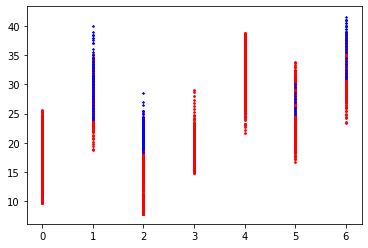

In [64]:
### 이런건 point 그래프보다는 count해서 막대그래프를 그릴 것

plt.scatter(x[:4320],train_X_mean,color='r',s=3)
plt.scatter(x[4320:],train_y,color='b',marker='*',s=3)

plt.xticks(range(0,7))

In [85]:
df1 = pd.DataFrame(np.array([y,x]).T,columns=['온도','그룹'])
df1

,온도,그룹
0,10.666667,0.0
1,10.444444,0.0
2,10.166667,0.0
3,10.000000,0.0
4,9.833333,0.0
...,...,...
4747,21.500000,1.0
4748,21.500000,1.0
4749,21.500000,1.0
4750,21.500000,1.0


In [86]:
df1.groupby('그룹').mean().sort_values(by='온도')

,온도
그룹,
4.0,17.461491
0.0,18.407746
5.0,18.678894
1.0,20.724178
3.0,22.235896
2.0,30.406802
6.0,31.241485


In [ ]:
df1.sort_values(by='그룹')

In [98]:
after_mean_scaled.shape

(4752, 6)

In [100]:
y.shape

(4752,)

In [79]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

lasso = Lasso()
ridge = Ridge()


In [116]:
print(np.mean(cross_val_score(lasso,after_mean_scaled,y,scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(ridge,after_mean_scaled,y,scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lin,after_mean_scaled,y,scoring='neg_mean_squared_error')))


-4.873874504861986
-3.380241169553385
-3.407465662108824


In [80]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(after_mean_scaled,y)

In [105]:
lin.fit(X_train,y_train)
lin.score(X_test,y_test)

0.9457973091575053

In [83]:
mean_list=[temperature_air,pressure,pressure_sea,radi_day,humidity]

In [84]:
temp = []
for col in mean_list:
    processing = test[col].mean(axis=1)
    temp.append(processing)

In [85]:
after_mean_test = pd.DataFrame(np.array(temp).T)
after_mean_test.columns=['기온','현지기압','해면기압','일사량','습도']

In [86]:
after_mean_test

,기온,현지기압,해면기압,일사량,습도
0,19.94,996.18,1007.34,0.00,85.22
1,19.92,996.12,1007.28,0.00,85.52
2,19.90,996.06,1007.22,0.00,85.62
3,19.72,996.04,1007.20,0.00,86.18
4,19.68,996.08,1007.24,0.00,86.72
...,...,...,...,...,...
11515,25.54,1001.72,1012.70,18.33,77.84
11516,25.84,1001.70,1012.68,18.33,75.56
11517,25.70,1001.74,1012.74,18.33,76.20
11518,25.68,1001.72,1012.70,18.33,76.00


In [87]:
tttest = scale.fit_transform(after_mean_test)

In [118]:
ridge.fit(after_mean_scaled,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [119]:
pred = ridge.predict(tttest)

In [116]:
sub = pd.read_csv('온도추정/sample_submission.csv')

In [117]:
sub['Y18']=pred

In [118]:
sub.to_csv('temp_sub.csv',index=False)

In [113]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,train_real_scaled,y,scoring='neg_mean_squared_error'))

-1.366494440792958

In [115]:
rf.fit(train_real_scaled,y)
pred = rf.predict(test_real_scaled)